## ACP et clustering avec Python
* librairie ``pca`` pour l'ACP et librairie ``scikit-learn`` pour le clustering

Au cas où la librairie ``pca`` n'est pas installée, on peut exécuter la ligne suivante dans le notebook :

In [5]:
!pip install pca --quiet

DEPRECATION: greece 0.12.3 has a non-standard dependency specifier shapely>=1.6.4tables>=3.4.4. pip 24.0 will enforce this behaviour change. A possible replacement is to upgrade to a newer version of greece or contact the author to suggest that they release a version with a conforming dependency specifiers. Discussion can be found at https://github.com/pypa/pip/issues/12063


In [6]:
import matplotlib
matplotlib.__version__

'3.8.0'

### Importation des librairies nécessaires
* ``pandas`` pour lire le fichier de données
* ``pca`` pour réaliser l'ACP
* ``scikit-learn`` pour le clustering

In [7]:
import pandas as pd
from pca import pca

### Lecture du fichier

In [8]:
dataset = pd.read_csv("Python-2023/datampody.csv", index_col=0)
dataset

Tur      Cond      pH       T     NO3-    NO2-    NH4+   PO43-  \
Wells                                                                       
P01    22.6600   62.3500  5.9175  27.875  10.4950  0.0125  0.3300  0.0775   
P02    10.8300   44.6250  5.1550  26.000   1.1050  0.0225  0.1200  0.0575   
P03    17.2700  106.6750  5.4025  27.050  10.6100  0.0225  0.2325  0.0550   
P04     7.1075   25.8525  5.1400  26.850   3.3750  0.0350  0.1750  0.0975   
P05    35.8000   37.9250  5.4875  26.250   6.0200  0.0325  0.1025  0.1850   
...        ...       ...     ...     ...      ...     ...     ...     ...   
P68    54.7100  430.7500  6.1175  28.450  18.5850  0.1100  1.0200  0.0725   
P69    27.6750  151.1750  6.0650  28.525  15.0050  0.0450  0.2550  0.0475   
P70    71.7250   96.9500  6.2550  28.275  16.0275  0.5400  0.2125  0.0775   
P71    35.0625  224.8250  6.3475  28.175   5.7100  0.2575  0.5800  0.2950   
P72    14.1400  112.0500  5.7000  28.500   7.6450  0.0300  1.2150  0.0375   

          Cl-         TAC     DHT  SO42-   HCO3-      CTH   E.coli  E.faecalis  
Wells                                                                           
P01    10.900   73.750000  16.250   7.75   63.75   260.25   117.75      187.50  
P02    10.525   51.500000  23.750   4.00   73.75   253.25   200.75       98.25  
P03     8.150   46.250000  12.500   3.25   60.00   835.00   785.00     3525.00  
P04     3.475   45.000000  10.125   3.00   68.75   408.75   406.25      240.25  
P05     3.225   42.500000  21.250   4.50   50.00   625.00   565.00      240.00  
...       ...         ...     ...    ...     ...      ...      ...         ...  
P68    29.700  216.250000  96.250  40.50  215.00  2365.00  2065.00     2784.75  
P69    15.350   75.000000  30.000  11.00   90.00  2162.50  2125.00     2287.50  
P70    11.300  147.500000  62.500  20.75  182.50  2327.50  1702.50     3542.50  
P71    19.750  178.750000  53.750  26.75  203.75   362.00   324.50      716.00  
P72     5.400   93.333333  30.000   7.50   95.00   880.00   880.00      838.00  

[72 rows x 16 columns]

### ACP
* La classe ``pca`` permet de normaliser (z-score) les données en entrée via
```python
normalize=True
```
* l'argument ``n_components`` permet de différentes façons de renvoyer un certain nbre de PCs. On peut exprimer le pourcentage minimal de variance expliquée ou le nombre de PCs que l'on souhaite :
```python
n_components=0.95
OU
n_components=5
```
On construit l'objet ``model`` qui va nous permettre d'appeler la méthode ``fit_transform`` :

---

In [9]:
model = pca(normalize=True, n_components=0.95)
model.fit_transform(dataset)

[pca] >Extracting column labels from dataframe.
[pca] >Extracting row labels from dataframe.
[pca] >Normalizing input data per feature (zero mean and unit variance)..
[pca] >The PCA reduction is performed to capture [95.0%] explained variance using the [16] columns of the input data.
[pca] >Fit using PCA.
[pca] >Compute loadings and PCs.
[pca] >Compute explained variance.
[pca] >Number of components is [11] that covers the [95.00%] explained variance.
[pca] >The PCA reduction is performed on the [16] columns of the input dataframe.
[pca] >Fit using PCA.
[pca] >Compute loadings and PCs.
[pca] >Outlier detection using Hotelling T2 test with alpha=[0.05] and n_components=[11]
[pca] >Multiple test correction applied for Hotelling T2 test: [fdr_bh]
[pca] >Outlier detection using SPE/DmodX with n_std=[3]


{'loadings':            Tur      Cond        pH         T      NO3-      NO2-      NH4+  \
 PC1   0.247014  0.232614  0.185654  0.154998  0.135570  0.310519  0.184435   
 PC2   0.185122 -0.305421  0.103196 -0.343924 -0.300845 -0.028268 -0.184238   
 PC3  -0.253878  0.356202 -0.256515  0.076208  0.407648  0.032984  0.201997   
 PC4   0.082528 -0.153679 -0.237013 -0.055077 -0.038698  0.326869  0.321488   
 PC5  -0.168189  0.041257  0.618334 -0.343504 -0.149100  0.378840  0.371161   
 PC6  -0.435632 -0.006931  0.205322 -0.067033 -0.104082 -0.186810 -0.434594   
 PC7   0.467950 -0.208088  0.226520  0.242641  0.191941  0.180953 -0.305737   
 PC8   0.003142  0.214151  0.025320 -0.548466  0.550198  0.214274 -0.404815   
 PC9  -0.418565 -0.171137  0.139107  0.509349  0.039855  0.499632 -0.246707   
 PC10  0.219293 -0.214567  0.104616  0.028399  0.240726  0.045972 -0.043764   
 PC11 -0.012563 -0.108640 -0.418912 -0.293503 -0.165719  0.386351 -0.027739   
 
          PO43-       Cl-       TAC   

---

#### Plot de la variance expliquée

(<Figure size 1500x1000 with 1 Axes>,
 <Axes: title={'center': 'Cumulative explained variance\n 11 Principal Components explain [97.40%] of the variance.'}, xlabel='Principle Component', ylabel='Percentage explained variance'>)

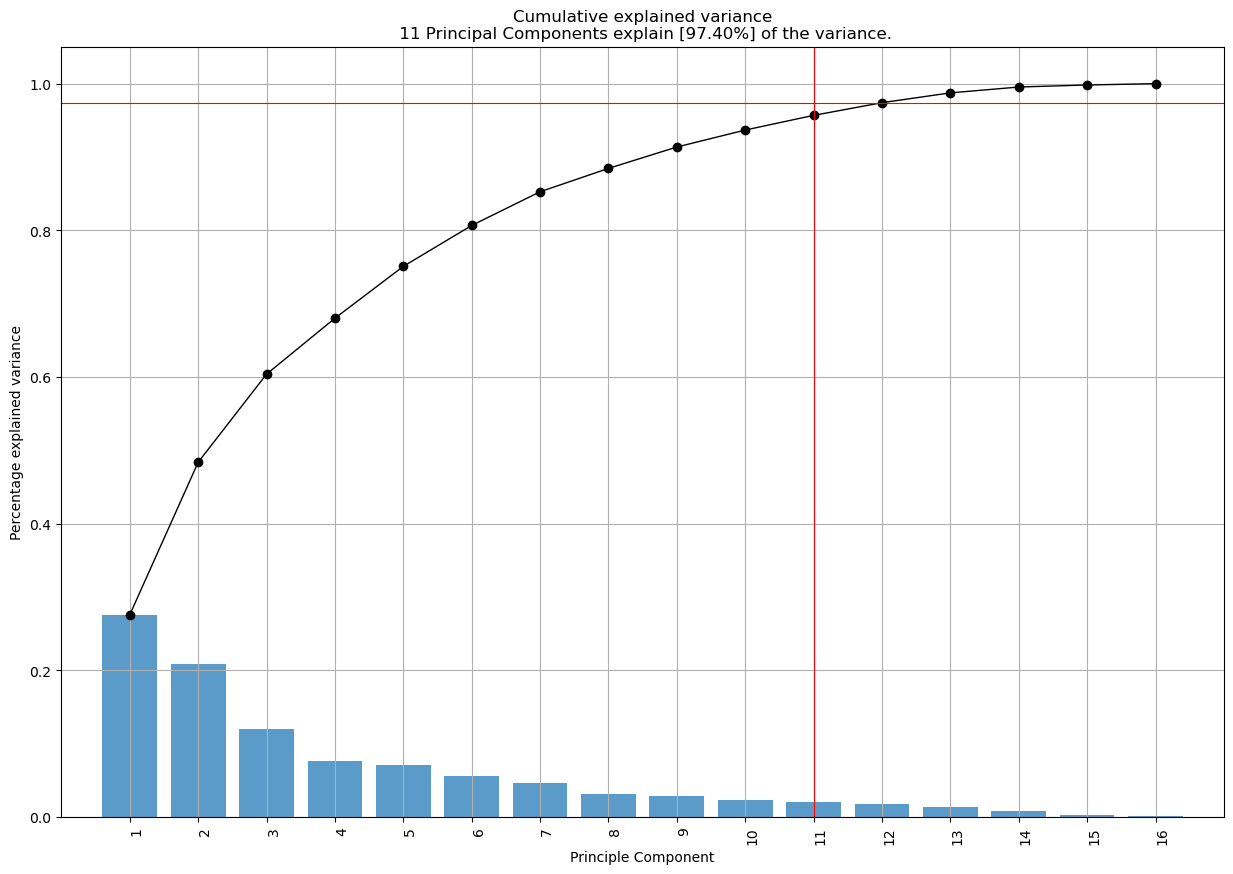

In [10]:
model.plot()

#### Scatter plot sur PC1 et PC2 des observations (puits)

In [11]:
import warnings
warnings.filterwarnings("ignore")

* Scatter plot sans les labels

[scatterd] >INFO> Add density layer
[scatterd] >INFO> Create scatterplot


(<Figure size 2500x1500 with 1 Axes>,
 <Axes: title={'center': '11 Principal Components explain [97.40%] of the variance'}, xlabel='PC1 (27.5% expl.var)', ylabel='PC2 (20.7% expl.var)'>)

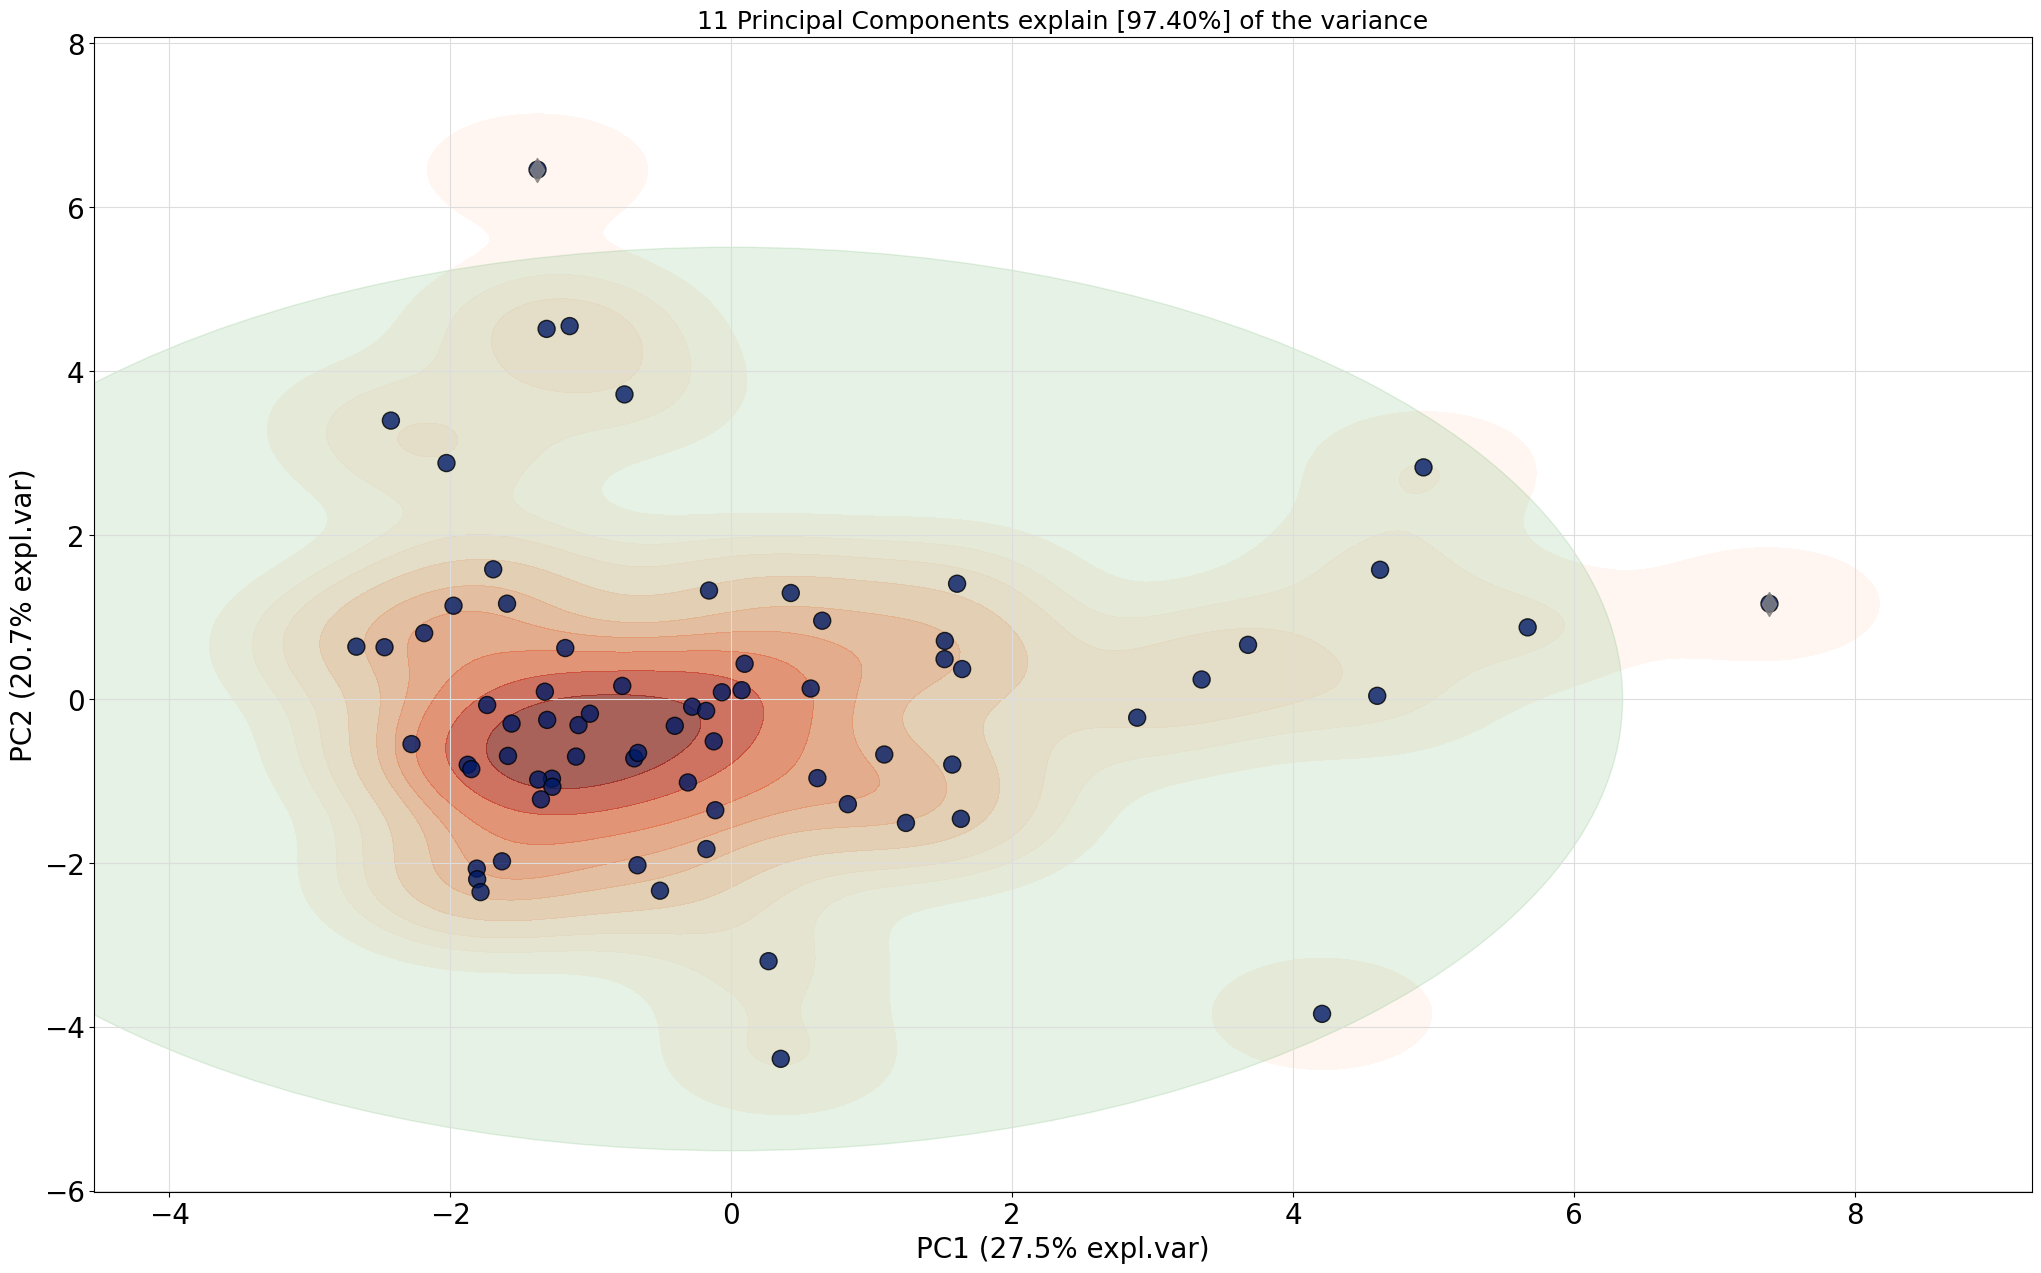

In [12]:
model.scatter(SPE=True, density=True)

* Scatter plot avec labels

[scatterd] >INFO> Add density layer
[scatterd] >INFO> Create scatterplot


(<Figure size 2500x1500 with 1 Axes>,
 <Axes: title={'center': '11 Principal Components explain [97.40%] of the variance'}, xlabel='PC1 (27.5% expl.var)', ylabel='PC2 (20.7% expl.var)'>)

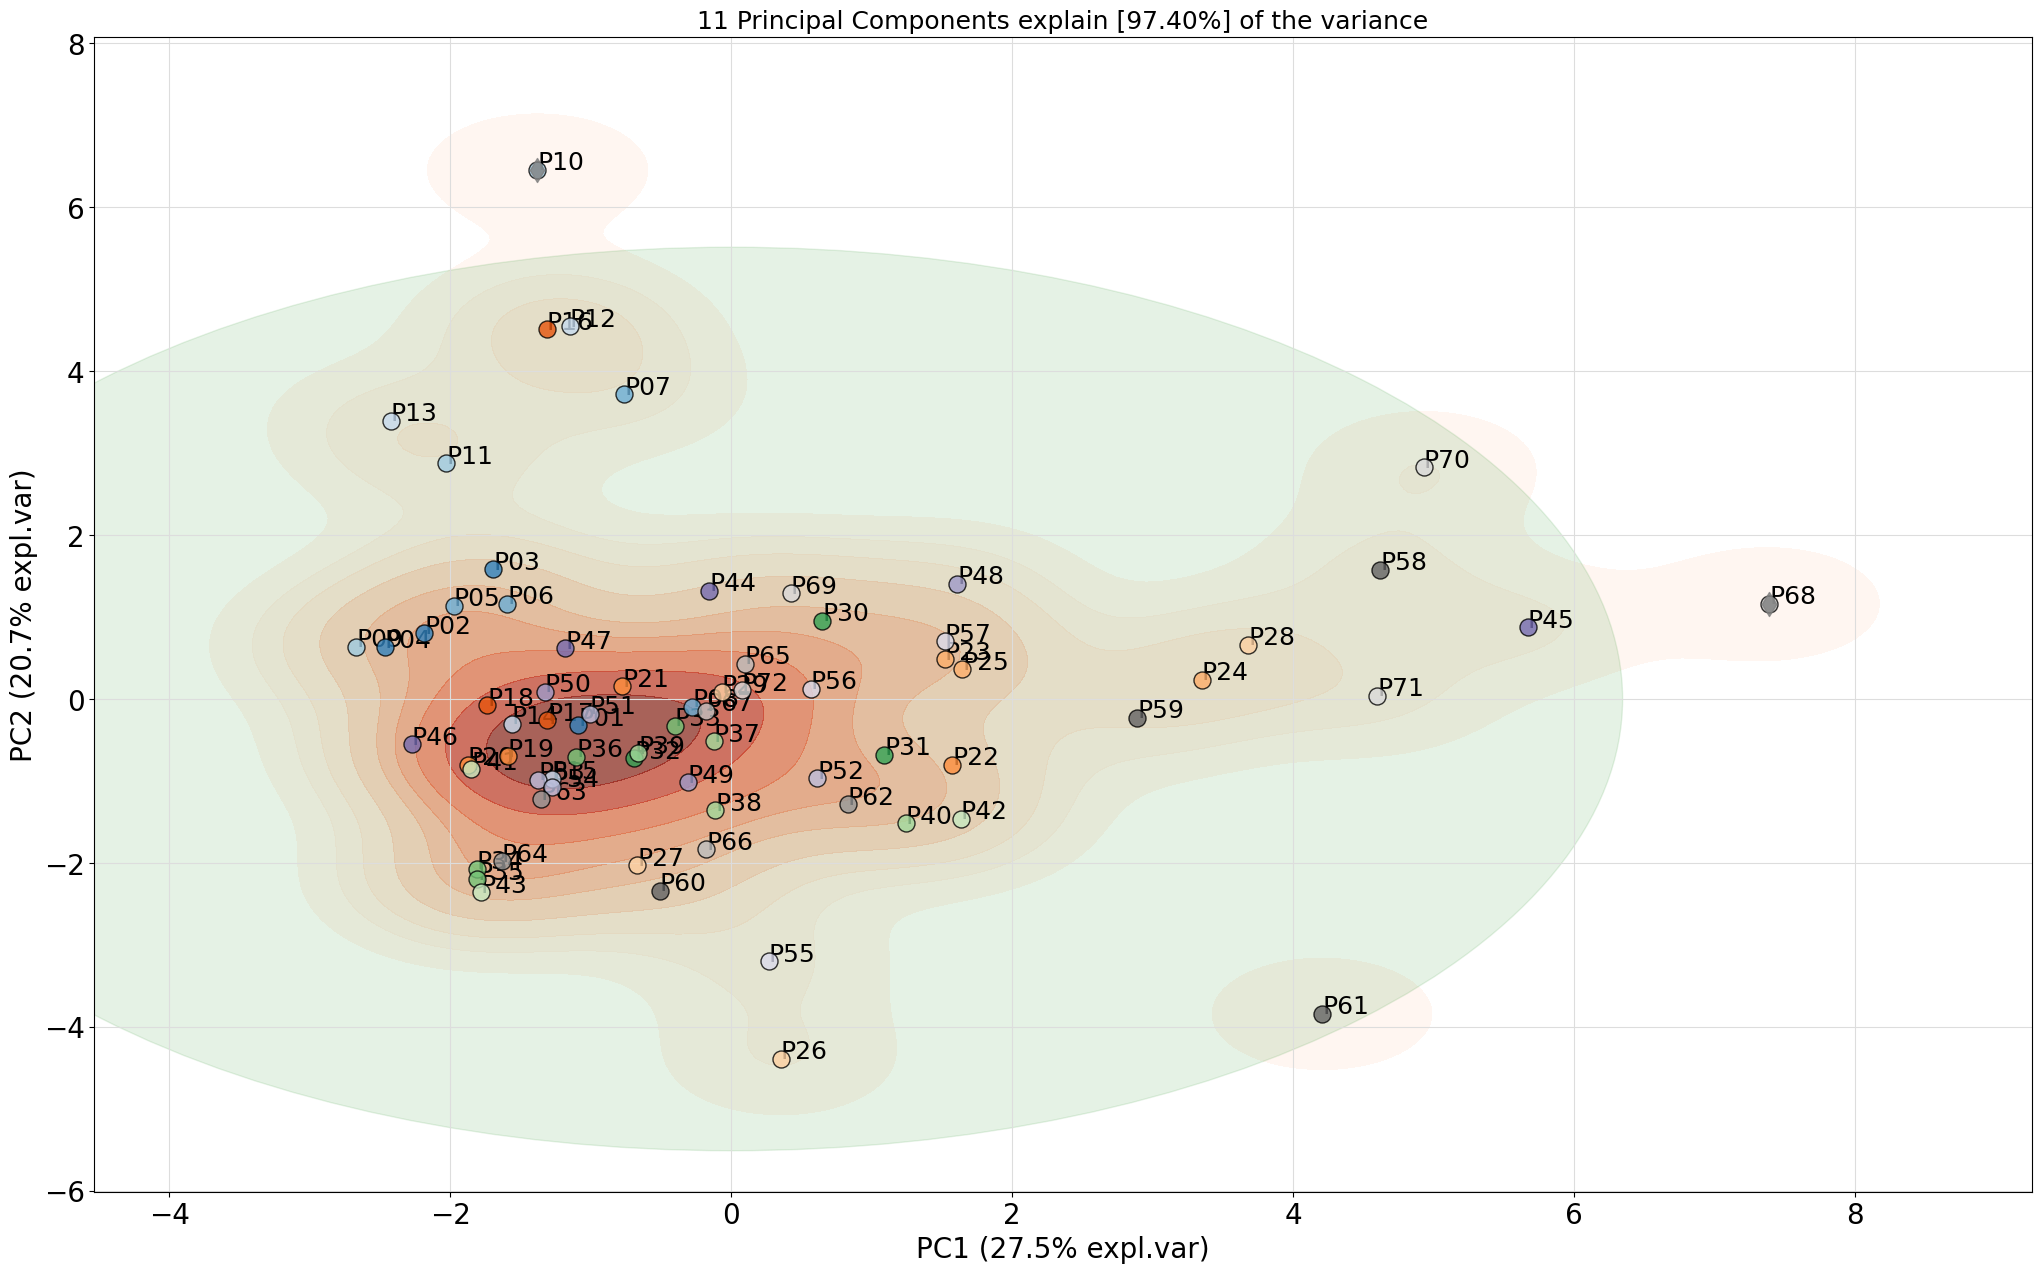

In [13]:
model.scatter(SPE=True, density=True, labels=dataset.index)

#### Scatter plot des autres PC (1 et 3, etc.)

[scatterd] >INFO> Add density layer
[scatterd] >INFO> Create scatterplot


(<Figure size 2500x1500 with 1 Axes>,
 <Axes: title={'center': '11 Principal Components explain [97.40%] of the variance'}, xlabel='PC1 (27.5% expl.var)', ylabel='PC3 (12.0% expl.var)'>)

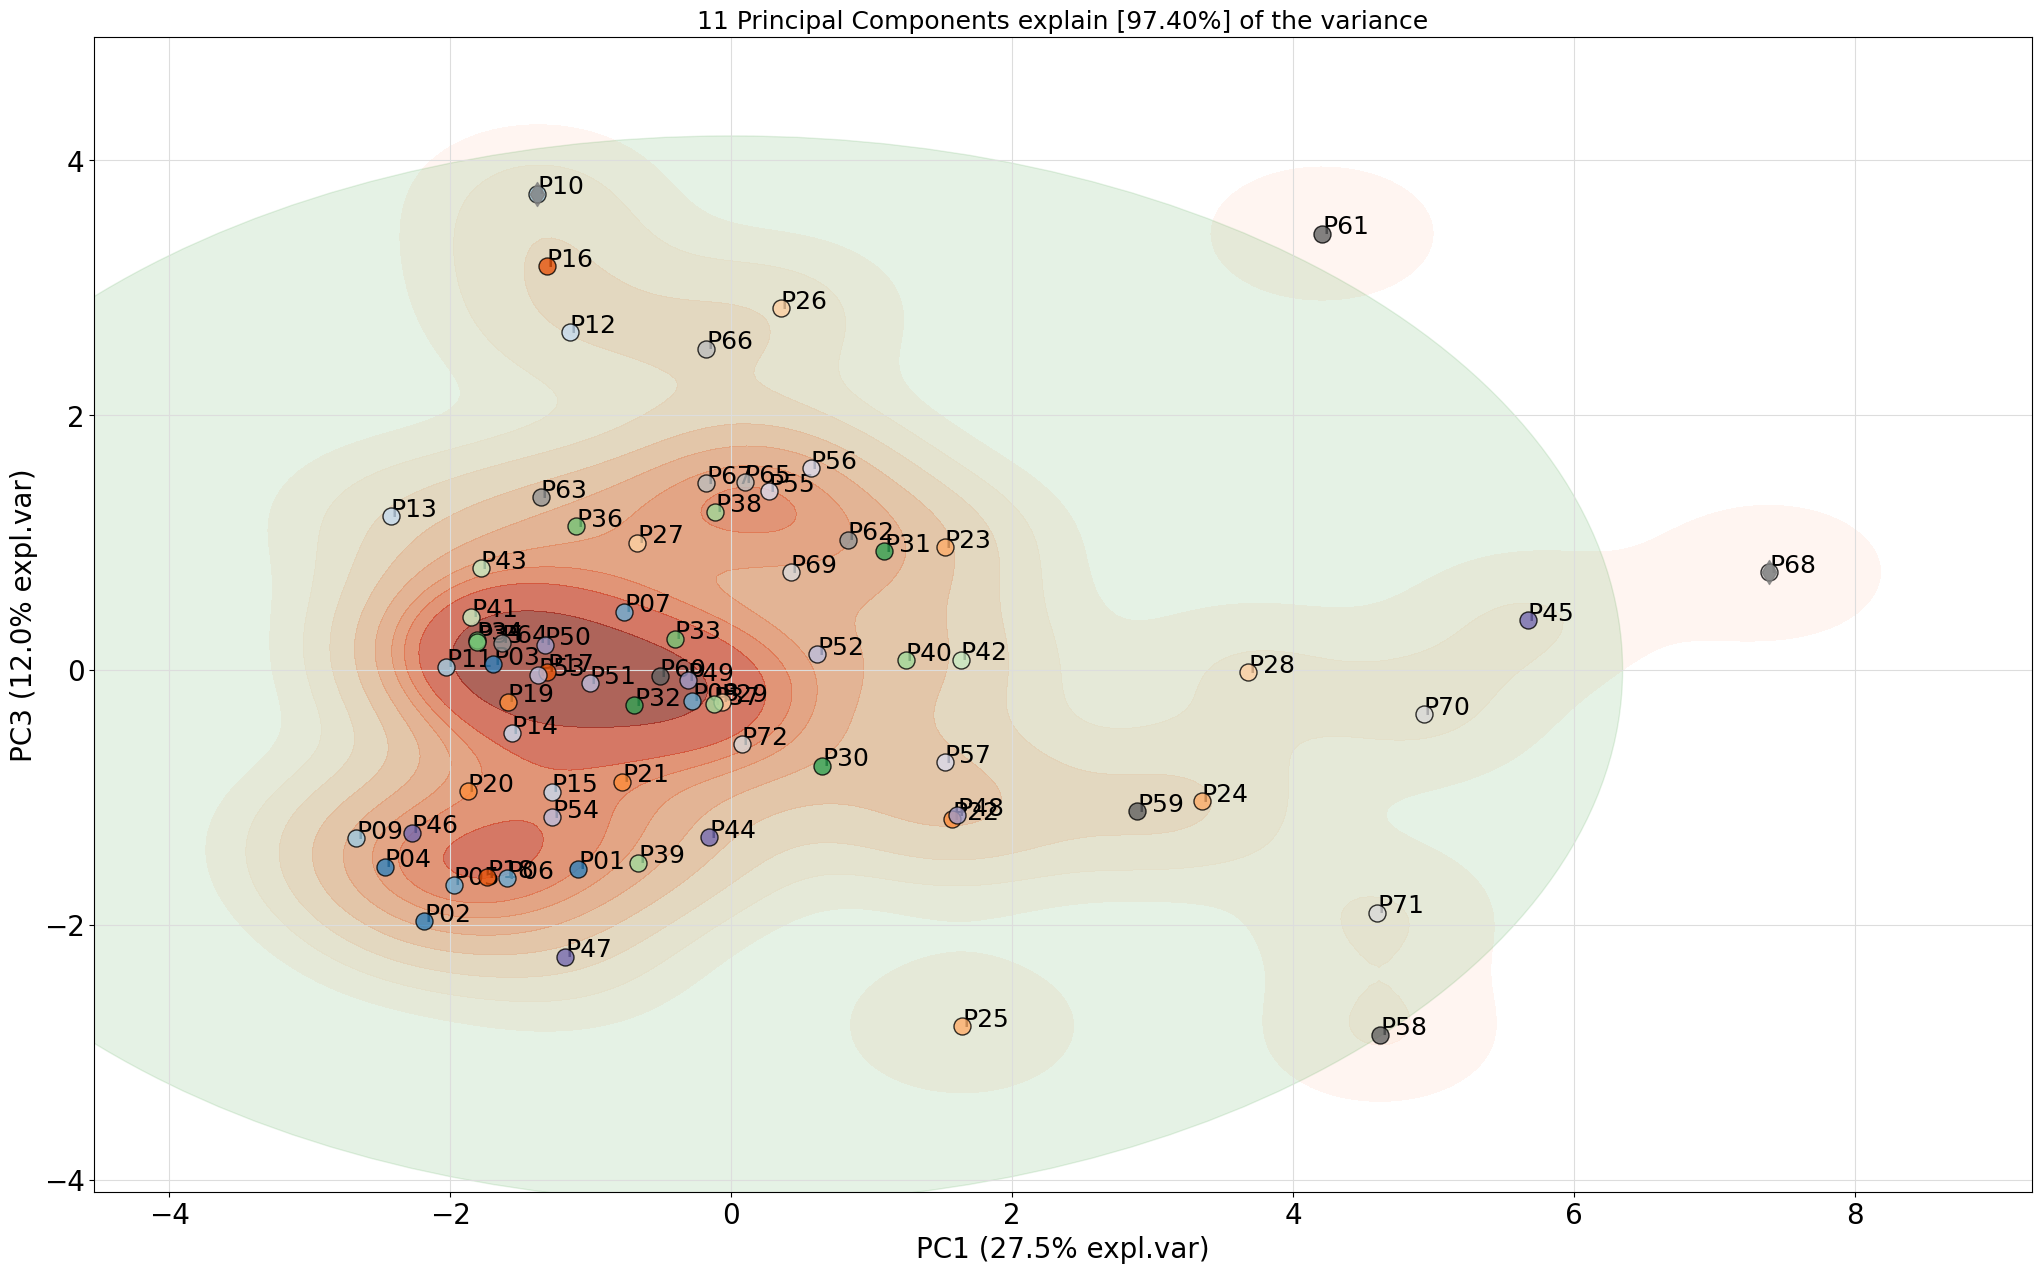

In [14]:
model.scatter(SPE=True, density=True, labels=dataset.index, PC=[0,2])

#### Biplot des loadings
Il semble que le package ``pca`` utilise la terminologie de __R__. Autrement dit, ici, les loadings sont en fait les vecteurs propres (_eigen vectors_). Cependant, en réalité, les _loadings_ (aussi appelés _correlation loadings_ dans __R__) sont en réalité les vecteurs propres normalisés par la racine carrée des valeurs propres :
* $loadings = eigenvectors \cdot \sqrt{eigenvalues}$
* Les _loadings_ représentent la matrice de corrélation entre les variables et les axes (PCs)  de l'ACP

[scatterd] >INFO> Create scatterplot


[pca] >Plot PC1 vs PC2 with loadings.


(<Figure size 2500x1500 with 1 Axes>,
 <Axes: title={'center': '11 Principal Components explain [97.40%] of the variance'}, xlabel='PC1 (27.5% expl.var)', ylabel='PC2 (20.7% expl.var)'>)

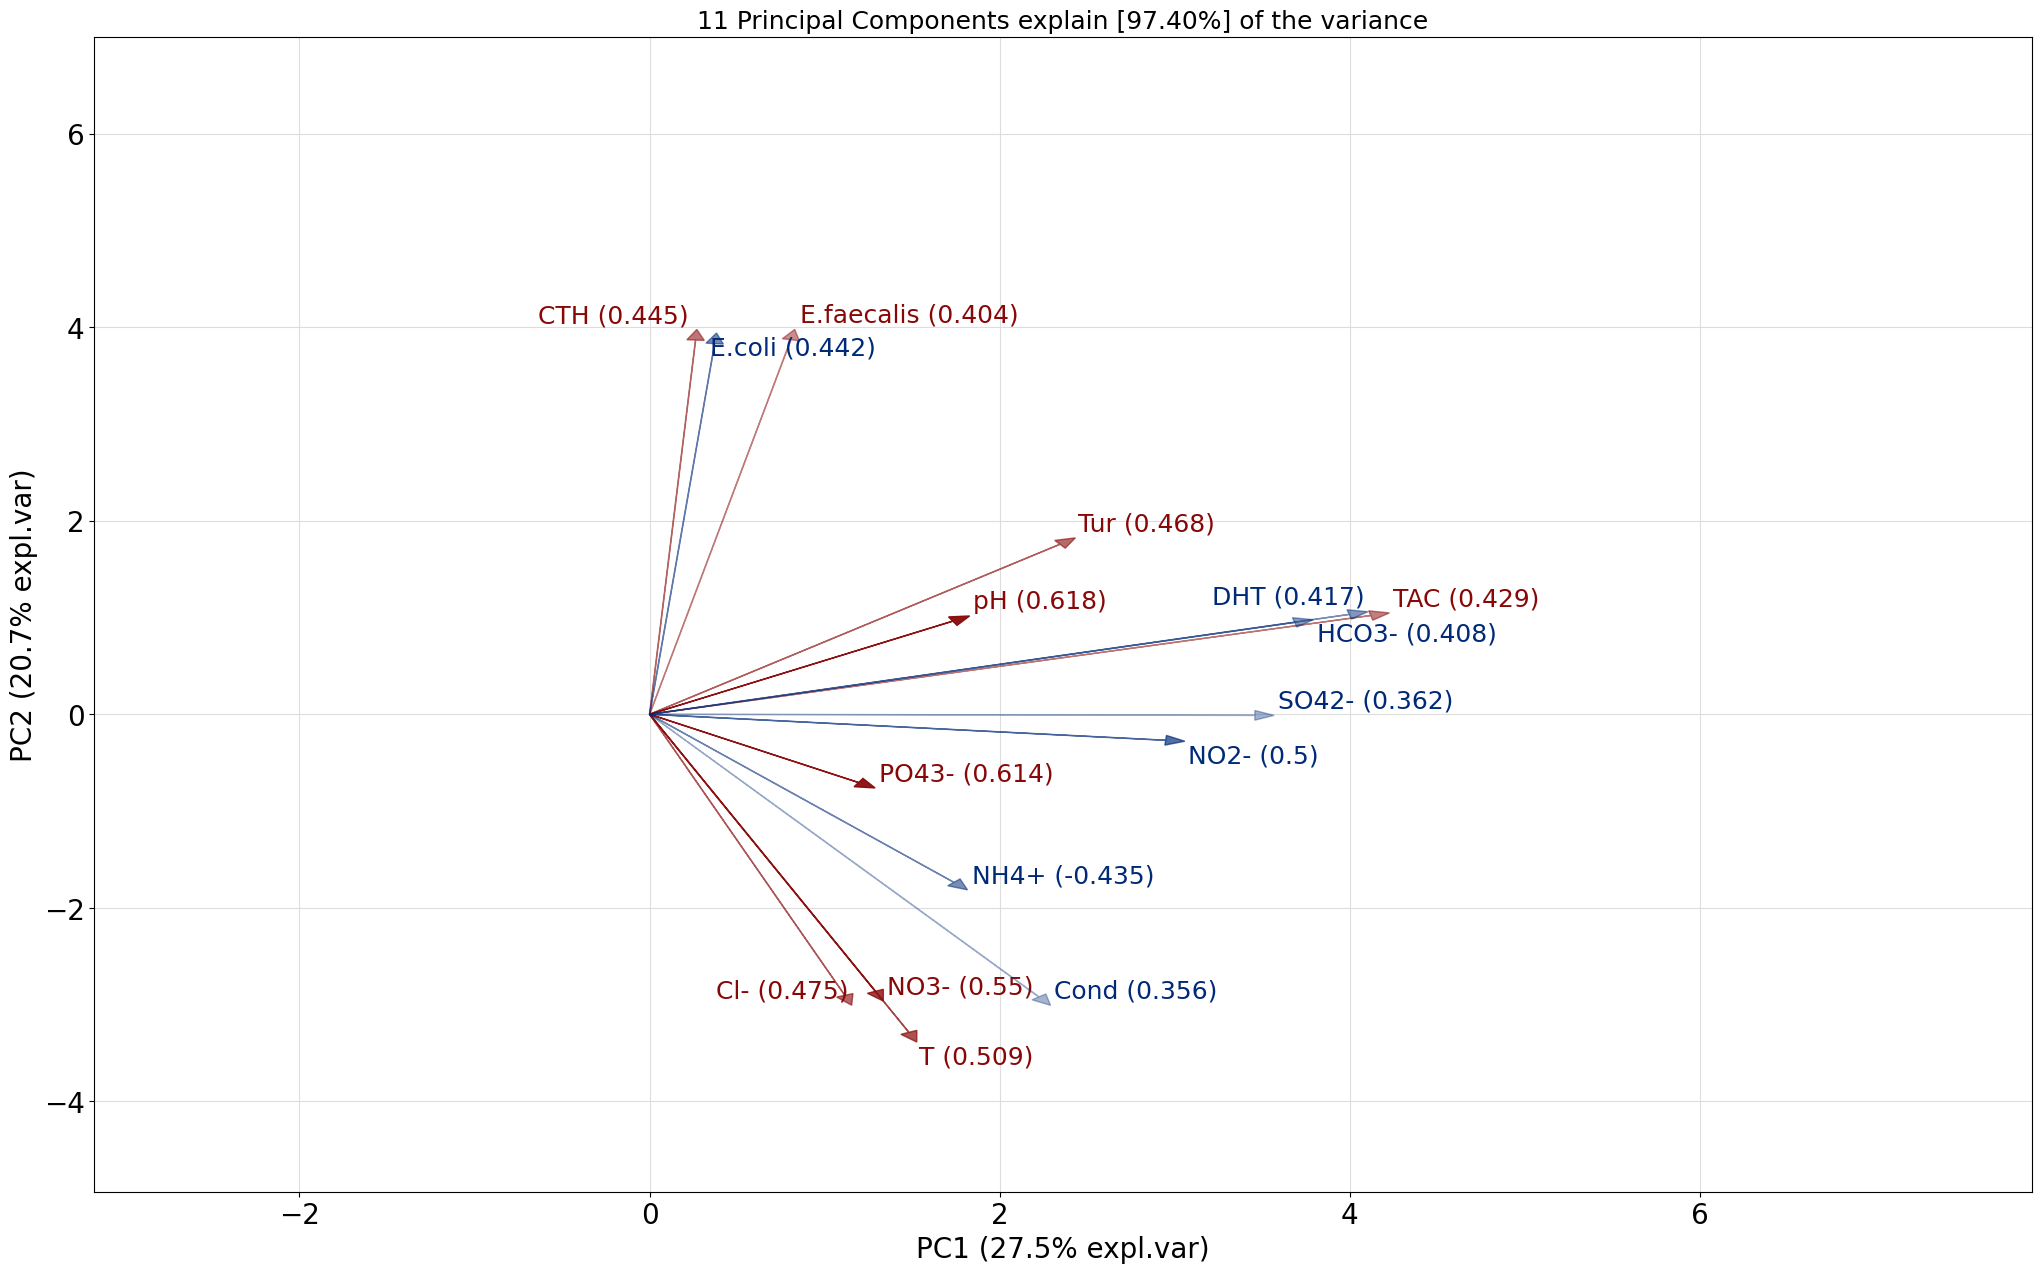

In [15]:
model.biplot(cmap=None)

#### Best performing features

In [16]:
model.results["topfeat"]

PC     feature   loading  type
0    PC1         TAC  0.429206  best
1    PC2  E.faecalis  0.403953  best
2    PC3         CTH  0.445236  best
3    PC4       PO43-  0.613767  best
4    PC5          pH  0.618334  best
5    PC6       PO43-  0.605460  best
6    PC7         Tur  0.467950  best
7    PC8        NO3-  0.550198  best
8    PC9           T  0.509349  best
9   PC10  E.faecalis -0.777093  best
10  PC11         Cl-  0.474772  best
11   PC3        Cond  0.356202  weak
12   PC9        NO2-  0.499632  weak
13   PC6        NH4+ -0.434594  weak
14   PC1         DHT  0.416685  weak
15   PC1       SO42-  0.362298  weak
16  PC11       HCO3-  0.407649  weak
17   PC3      E.coli  0.442472  weak

In [17]:
model.results["loadings"]

Tur      Cond        pH         T      NO3-      NO2-      NH4+  \
PC1   0.247014  0.232614  0.185654  0.154998  0.135570  0.310519  0.184435   
PC2   0.185122 -0.305421  0.103196 -0.343924 -0.300845 -0.028268 -0.184238   
PC3  -0.253878  0.356202 -0.256515  0.076208  0.407648  0.032984  0.201997   
PC4   0.082528 -0.153679 -0.237013 -0.055077 -0.038698  0.326869  0.321488   
PC5  -0.168189  0.041257  0.618334 -0.343504 -0.149100  0.378840  0.371161   
PC6  -0.435632 -0.006931  0.205322 -0.067033 -0.104082 -0.186810 -0.434594   
PC7   0.467950 -0.208088  0.226520  0.242641  0.191941  0.180953 -0.305737   
PC8   0.003142  0.214151  0.025320 -0.548466  0.550198  0.214274 -0.404815   
PC9  -0.418565 -0.171137  0.139107  0.509349  0.039855  0.499632 -0.246707   
PC10  0.219293 -0.214567  0.104616  0.028399  0.240726  0.045972 -0.043764   
PC11 -0.012563 -0.108640 -0.418912 -0.293503 -0.165719  0.386351 -0.027739   

         PO43-       Cl-       TAC       DHT     SO42-     HCO3-       CTH  \
PC1   0.130814  0.117235  0.429206  0.416685  0.362298  0.385044  0.027406   
PC2  -0.077294 -0.305304  0.106377  0.107613 -0.001127  0.099251  0.403824   
PC3   0.108138  0.144922 -0.115899 -0.099554 -0.116771 -0.088937  0.445236   
PC4   0.613767 -0.439526  0.043527  0.028519 -0.325059 -0.042144 -0.061563   
PC5   0.018720  0.175926 -0.182415 -0.236276  0.085408 -0.189013  0.023125   
PC6   0.605460  0.211932  0.086717 -0.025075  0.003665  0.282823  0.037029   
PC7   0.212260  0.398379 -0.185639  0.069443 -0.332427 -0.246468 -0.004252   
PC8  -0.050463 -0.264824 -0.099902  0.091869  0.026274  0.011146 -0.147753   
PC9  -0.241358 -0.310457  0.001169 -0.114807 -0.064769  0.134923  0.016488   
PC10 -0.137348 -0.042078  0.001262 -0.082050 -0.020915  0.110045  0.311707   
PC11 -0.191521  0.474772  0.093583 -0.168440 -0.259705  0.407649  0.039750   

        E.coli  E.faecalis  
PC1   0.038808    0.084198  
PC2   0.400097    0.403953  
PC3   0.442472    0.239560  
PC4  -0.053664   -0.109344  
PC5   0.039522   -0.025458  
PC6   0.090635   -0.140321  
PC7   0.005223    0.223903  
PC8  -0.160834    0.023536  
PC9  -0.006541    0.118790  
PC10  0.301979   -0.777093  
PC11 -0.120120   -0.007525

---
#### ACP avec ``scikit-learn`` et représentation des véritables loadings

On construit une fonction qui permet de normaliser (z-score) les données

In [18]:
def standardize(data):
    return (data - data.mean(axis=0)) / data.std(axis=0)

On importe et on normalise

In [19]:
import numpy as np
from sklearn.decomposition import PCA
data = dataset.to_numpy()
data = standardize(data)

On construit l'objet ``PCA``, on fitte puis on extrait les vecteurs propres, et on calcule les véritables loadings

In [20]:
sk_pca = PCA(n_components=11)
sk_pca.fit(data)
eigen_vectors = sk_pca.components_.T
loadings = eigen_vectors * np.sqrt(sk_pca.explained_variance_)

On stocke les résultats dans une dataframe

In [21]:
results = pd.DataFrame(data=loadings.T, index=model.results["loadings"].index, columns=model.results["loadings"].keys())
results

Tur      Cond        pH         T      NO3-      NO2-      NH4+  \
PC1   0.522471  0.492012  0.392685  0.327844  0.286751  0.656794  0.390107   
PC2   0.340060 -0.561044  0.189566 -0.631772 -0.552637 -0.051928 -0.338436   
PC3  -0.354468  0.497335 -0.358150  0.106402  0.569165  0.046052  0.282032   
PC4   0.091803 -0.170952 -0.263653 -0.061268 -0.043047  0.363608  0.357622   
PC5  -0.180110  0.044181  0.662161 -0.367852 -0.159669  0.405692  0.397469   
PC6  -0.414600 -0.006597  0.195409 -0.063797 -0.099057 -0.177791 -0.413613   
PC7   0.404029 -0.179663  0.195577  0.209496  0.165722  0.156235 -0.263973   
PC8   0.002259  0.153925  0.018199 -0.394220  0.395465  0.154013 -0.290968   
PC9  -0.288013 -0.117759  0.095719  0.350480  0.027424  0.343794 -0.169758   
PC10  0.134372 -0.131476  0.064103  0.017402  0.147505  0.028169 -0.026817   
PC11 -0.007158 -0.061899 -0.238680 -0.167227 -0.094420  0.220128 -0.015805   

         PO43-       Cl-       TAC       DHT     SO42-     HCO3-       CTH  \
PC1   0.276690  0.247969  0.907834  0.881349  0.766314  0.814425  0.057969   
PC2  -0.141985 -0.560828  0.195409  0.197680 -0.002069  0.182319  0.741805   
PC3   0.150983  0.202343 -0.161821 -0.138999 -0.163037 -0.124175  0.621646   
PC4   0.682752 -0.488928  0.048420  0.031725 -0.361595 -0.046881 -0.068482   
PC5   0.020047  0.188395 -0.195344 -0.253024  0.091462 -0.202410  0.024764   
PC6   0.576229  0.201701  0.082531 -0.023864  0.003488  0.269169  0.035241   
PC7   0.183265  0.343960 -0.160281  0.059957 -0.287017 -0.212801 -0.003671   
PC8  -0.036271 -0.190347 -0.071806  0.066032  0.018885  0.008011 -0.106200   
PC9  -0.166077 -0.213624  0.000804 -0.078998 -0.044568  0.092840  0.011345   
PC10 -0.084160 -0.025783  0.000773 -0.050276 -0.012815  0.067430  0.190998   
PC11 -0.109121  0.270507  0.053320 -0.095971 -0.147970  0.232263  0.022648   

        E.coli  E.faecalis  
PC1   0.082085    0.178092  
PC2   0.734959    0.742041  
PC3   0.617786    0.334478  
PC4  -0.059696   -0.121634  
PC5   0.042324   -0.027263  
PC6   0.086259   -0.133547  
PC7   0.004509    0.193318  
PC8  -0.115602    0.016917  
PC9  -0.004501    0.081739  
PC10  0.185037   -0.476163  
PC11 -0.068440   -0.004288

In [39]:
from sklearn.decomposition import FactorAnalysis
from sklearn.preprocessing import StandardScaler
data_scaler = StandardScaler()
scaled_dataset = data_scaler.fit_transform(dataset)
sk_fa = FactorAnalysis(n_components=2)
sk_fa.fit(scaled_dataset)

FactorAnalysis(n_components=2)

---
### Hierarchical clustering

In [22]:
from sklearn.preprocessing import StandardScaler
data_scaler = StandardScaler()
scaled_dataset = data_scaler.fit_transform(dataset)

#### Via la fonction ``linkage`` de la librairie ``scipy``
* ``method`` : 'complete', 'average', 'single', 'centroid', 'median', 'weighted', 'ward'
* ``metric`` : 'braycurtis', 'canberra', 'chebyshev', 'cityblock', 'correlation', 'cosine', 'dice', 'euclidean', 'hamming', 'jaccard', 'jensenshannon', 'kulczynski1', 'mahalanobis', 'matching', 'minkowski', 'rogerstanimoto', 'russellrao', 'seuclidean', 'sokalmichener', 'sokalsneath', 'sqeuclidean', 'yule'.

In [23]:
from scipy.cluster.hierarchy import linkage, dendrogram

average_clustering = linkage(scaled_dataset, method="average", metric="euclidean")

### Plot des dendrogrammes

In [34]:
import matplotlib.pyplot as plt
import matplotlib
matplotlib.rcParams['figure.figsize'] = [14, 7]

---
#### Plot du clustering avec la méthode _ward_

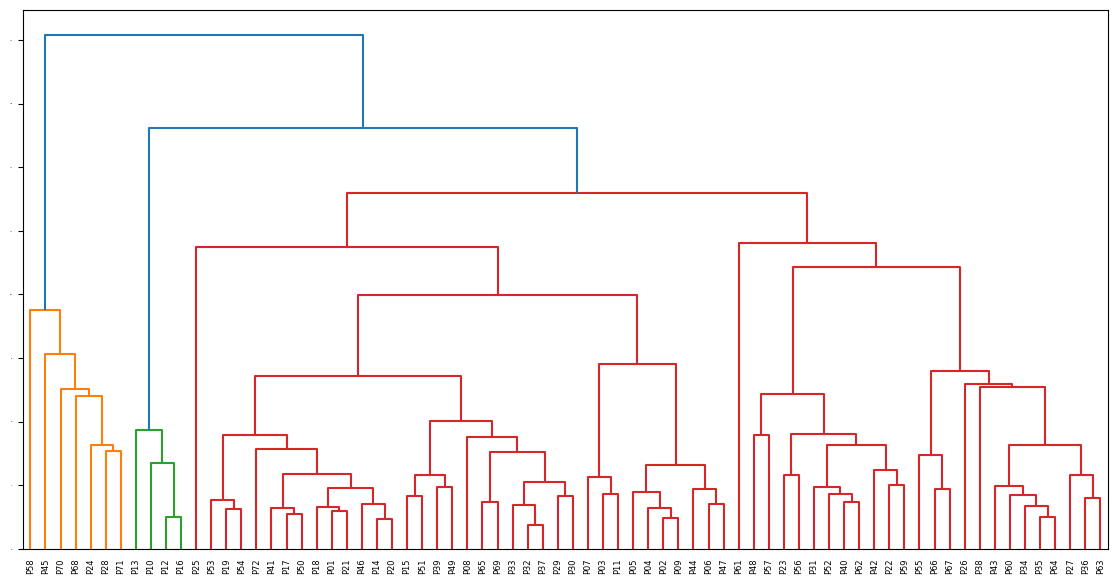

In [35]:
ward_clustering = linkage(scaled_dataset, method="ward", metric="euclidean")
dendrogram(ward_clustering, labels=dataset.index.values)
plt.show()

---
#### Plot du clustering avec la méthode _complete_

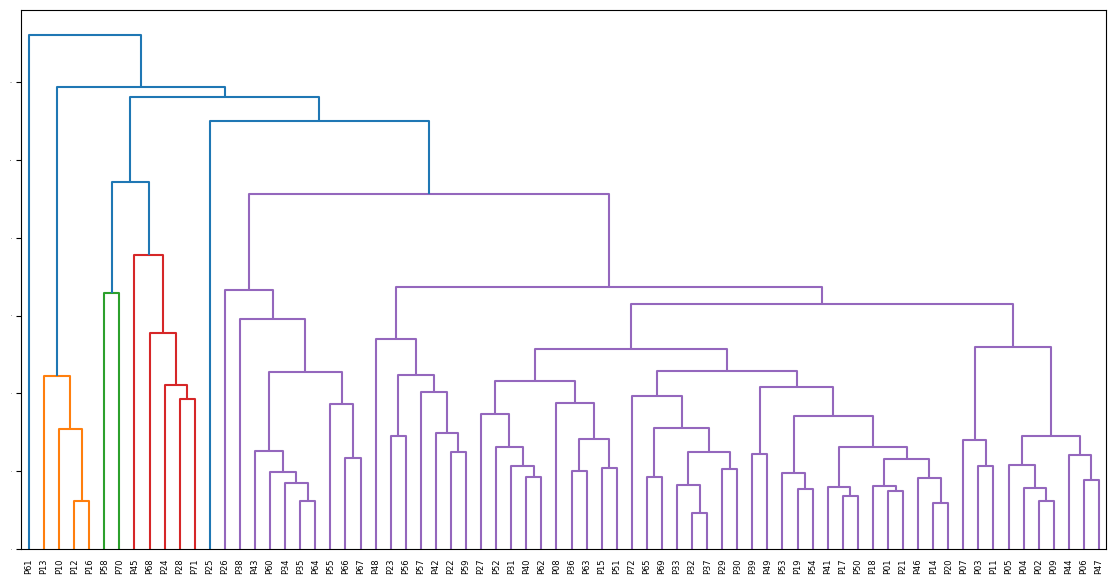

In [36]:
complete_clustering = linkage(scaled_dataset, method="complete", metric="euclidean")
dendrogram(complete_clustering, labels=dataset.index.values)
plt.show()

#### Plot du clustering avec la méthode _average_

In [ ]:
average_clustering = linkage(scaled_dataset, method="ward", metric="euclidean")
dendrogram(average_clustering, labels=dataset.index.values)
plt.show()

---
### Via ``scikit-learn``

In [ ]:
from sklearn.cluster import AgglomerativeClustering
model = AgglomerativeClustering(distance_threshold=0, n_clusters=None, compute_full_tree=True)
model = model.fit(scaled_dataset)

In [ ]:
def plot_dendrogram(model, **kwargs):
    # Create linkage matrix and then plot the dendrogram

    # create the counts of samples under each node
    counts = np.zeros(model.children_.shape[0])
    n_samples = len(model.labels_)
    for i, merge in enumerate(model.children_):
        current_count = 0
        for child_idx in merge:
            if child_idx < n_samples:
                current_count += 1  # leaf node
            else:
                current_count += counts[child_idx - n_samples]
        counts[i] = current_count

    linkage_matrix = np.column_stack(
        [model.children_, model.distances_, counts]
    ).astype(float)

    # Plot the corresponding dendrogram
    dendrogram(linkage_matrix, **kwargs)

In [ ]:
plot_dendrogram(model, labels=dataset.index.values)